In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import string
import re
import nltk
import glob
import os
import seaborn as sns
from google.colab import files
import io

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Import the Stopwords List**

In [ ]:
s = pd.read_csv(io.StringIO(uploaded1['book_stopwords.txt'].decode('UTF-8')))

# **Import the dataset and Stopwords list from Drive**

In [ ]:
# Dataset Read
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NLP Projects/Book Review Classification/RokomariBookReviews.csv',encoding='UTF-8')
# Stop word List
s = open('/content/drive/My Drive/Colab Notebooks/NLP Projects/Book Review Classification/stopwords-bn.txt',encoding = 'UTF-8')
t = s.read().split()

# **Text Cleaning**

In [ ]:
corpus = []
stp=["অামার","!", "@",'–', "#", "|", "%", "(", ")", "।", "—", ".", "-", "", ",", "’", "•", "‘", ":", "*", "?", "০", "১", "২", "৩", "৪", "৫", "৬", "৭", "৮", "৯"]

emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       u"\U0001f926-\U0001f937"
                       u"\u200d"
                       u"\u2640-\u2642" 
                      #u"\u0980-\u09FF"  # Bangla Text
                       u"\u09F7"
                       u"\u0964"
                       u"\u0061-\u0069"
                       u"\u200c"
                       u"\u006a-\u006f"
                      u"\u0041-\u005a" # Large A-Z
                      u"\u0061-\u007a" # small a-z
                      u"\u0030-\u0039" # 1-9 
                      u"\u09e7-\u09ef" #১-৯
                       #u"\u0070 -\u0079"
                       #u"\u007a"
                         u"\u0965"
                         u"\u201c"
                         u"\u201d"
                          u"\u2018" 
                          u"\u2019"
                          u"\u2013"
                          u"\u2014"
                          u"\u1f914"
                          
                       "]+", flags=re.UNICODE)

# Cleaing the text
for i in range(0,1000):
 
  clean = re.sub(r"[,.;@#?!&$0-9£]"," ", df['Review'][i])
  clean = emoji_pattern.sub(r'', df['Review'][i])    

  #result = clean.translate(str.maketrans(' ',' ', string.punctuation))
  result= re.sub('['+string.punctuation+']', ' ', clean)
      
  result = result.split()


  review = [word for word in result if not word in t and stp ]
  review =' '.join(review)
  corpus.append(review)
    

In [ ]:
corpus


# **Supress Warning Messages**

In [ ]:
def remove_warnings():
  # import warnings filter
  from warnings import simplefilter
  # ignore all future warnings
  simplefilter(action='ignore', category=FutureWarning)

# **Installing Bangla Fonts**

In [ ]:
from __future__ import unicode_literals
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
font_path = '/content/drive/My Drive/Colab Notebooks/NLP Projects/Book Review Classification/kalpurush.ttf'
prop = fm.FontProperties(fname=font_path)



# **Most Frequent Words**

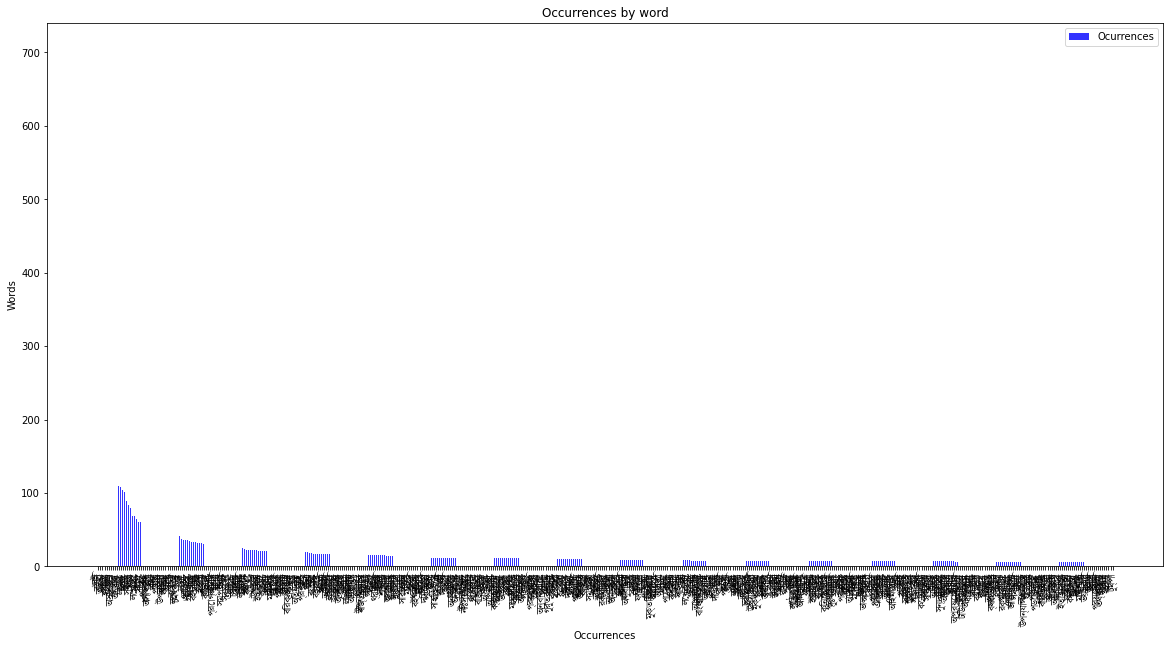

In [ ]:
clean_data = pd.DataFrame(corpus,columns=["Review"])    
clean_data['liked'] = df.iloc[:,1]    

reviews = clean_data.Review.str.cat(sep=' ')
tokens = reviews.split()
frequency_dist = nltk.FreqDist(tokens).most_common(500)
#a= frequency_dist.most_common(50)

#print(frequency_dist[50:70])
#frequency_dist.plot()
length = len(frequency_dist)

vals_films = [x[1] for x in frequency_dist]
legends_films = [x[0] for x in frequency_dist]

#fig, ax = plt.subplots()

index = np.arange(length)
bar_width = 0.2
opacity = 0.8
plt.figure(figsize=(20,10))
barplot = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')

#plt.figure(figsize=(20,10))
plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Occurrences by word')
plt.xticks(index + bar_width, legends_films,rotation=90,fontproperties=prop)
plt.legend()
#plt.tight_layout()
plt.show()

In [ ]:
print(frequency_dist)

[('বই', 705), ('বইটি', 292), ('ভালো', 267), ('একটা', 218), ('বইটা', 152), ('হয়েছে', 132), ('ভাল', 125), ('অসাধারণ', 120), ('বইয়ের', 111), ('এক', 109), ('অনুবাদ', 109), ('পড়ে', 108), ('লেখক', 104), ('খুবই', 101), ('লেখা', 89), ('পড়া', 83), ('সুন্দর', 80), ('শেষ', 69), ('লেগেছে', 68), ('সাথে', 64), ('গল্প', 60), ('বাজে', 60), ('পড়তে', 59), ('মত', 58), ('ধন্যবাদ', 57), ('অসাধারন', 57), ('হয়ে', 56), ('কথা', 55), ('দিয়ে', 54), ('পড়ার', 53), ('যায়', 52), ('উপন্যাস', 50), ('আরো', 49), ('বাংলা', 48), ('ফালতু', 45), ('আশা', 44), ('সময়', 43), ('কাহিনী', 43), ('লেখকের', 42), ('চমৎকার', 42), ('টা', 41), ('ভুল', 38), ('লাগে', 36), ('একজন', 36), ('হিসেবে', 36), ('গল্পের', 35), ('খারাপ', 33), ('নাম', 33), ('বইটিতে', 33), ('সহজ', 32), ('ভাই', 32), ('হতাশ', 32), ('কথায়', 31), ('লেখার', 31), ('কিভাবে', 30), ('টাকা', 30), ('প্রোগ্রামিং', 30), ('বইটির', 29), ('হয়নি', 29), ('ছোট', 29), ('সেরা', 29), ('সম্পর্কে', 28), ('নষ্ট', 28), ('নি', 28), ('সবচেয়ে', 27), ('এরকম', 26), ('পাঠক', 26), ('চরিত্র', 26), ('এক

In [ ]:
np.shape(tokens)

(25852,)

In [ ]:
frequency_dist = nltk.FreqDist(tokens).most_common()
np.shape(frequency_dist )

(6017, 2)

# **Most Appearing Positive words**

In [ ]:
positive_word_list = open('/content/drive/My Drive/Colab Notebooks/NLP Projects/Book Review Classification/porsitive words.txt',encoding = 'UTF-8')
positive_word_list = positive_word_list.read().split()

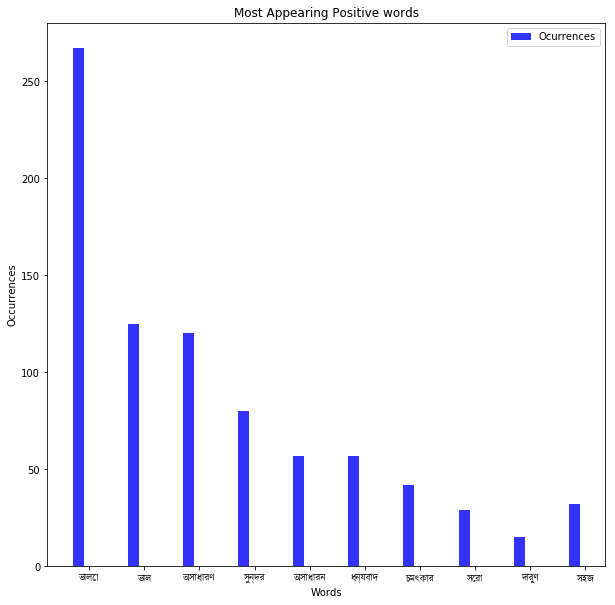

In [ ]:
p_list = []

for w in positive_word_list:
  for w1,f1 in frequency_dist:
    if w == w1:
     #print(f1)
     p_list.append((w,f1))
  
length = len(p_list)

vals_films = [x[1] for x in p_list]
legends_films = [x[0] for x in p_list]

#fig, ax = plt.subplots()

index = np.arange(length)
bar_width = 0.2
opacity = 0.8
plt.figure(figsize=(10,10))
barplot = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Most Appearing Positive words')
plt.xticks(index + bar_width, legends_films,fontproperties=prop)
plt.legend()
#plt.tight_layout()
plt.show()        


In [ ]:
print(p_list)

[('ভালো', 267), ('ভাল', 125), ('অসাধারণ', 120), ('সুন্দর', 80), ('অসাধারন', 57), ('ধন্যবাদ', 57), ('চমৎকার', 42), ('সেরা', 29), ('দারুণ', 15), ('সহজ', 32)]


# **Most appearing Negative Words**

In [ ]:
negative_word_list = open('/content/drive/My Drive/Colab Notebooks/NLP Projects/Book Review Classification/negative words.txt',encoding = 'UTF-8')
negative_word_list = negative_word_list.read().split()

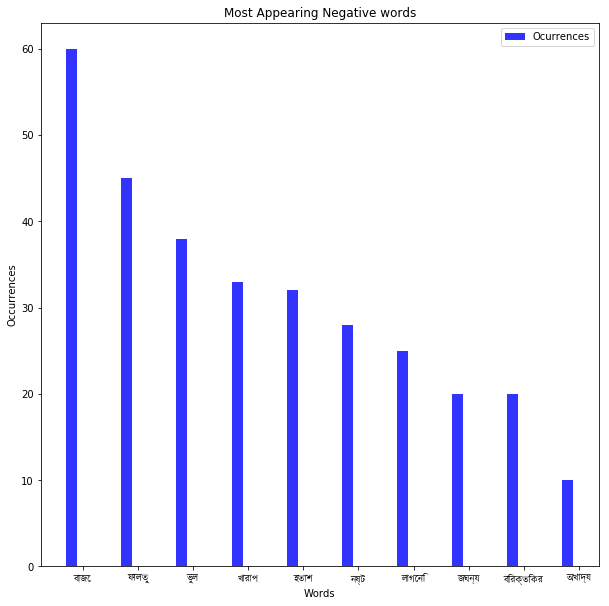

In [ ]:
n_list = []

for w in negative_word_list:
  for w1,f1 in frequency_dist:
    if w == w1:
     #print(f1)
     n_list.append((w,f1))
      
length = len(n_list)

vals_films = [x[1] for x in n_list]
legends_films = [x[0] for x in n_list]

#fig, ax = plt.subplots()

index = np.arange(length)
bar_width = 0.2
opacity = 0.8
plt.figure(figsize=(10,10))
barplot = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Most Appearing Negative words')
plt.xticks(index + bar_width, legends_films,fontproperties=prop)
plt.legend()
#plt.tight_layout()
plt.show()  
#
#plt.savefig('result.jpg')

In [ ]:
print(n_list)

[('বাজে', 60), ('ফালতু', 45), ('ভুল', 38), ('খারাপ', 33), ('হতাশ', 32), ('নষ্ট', 28), ('লাগেনি', 25), ('জঘন্য', 20), ('বিরক্তিকর', 20), ('অখাদ্য', 10)]


# **TF-IDF Unigram**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer() 
X = cv.fit_transform(corpus).toarray()
#X = pd.DataFrame(cv.transform(corpus).toarray(), columns=sorted(cv.vocabulary_.keys()))

y = clean_data.iloc[:,1].values.astype(int)

In [ ]:
X.shape

(1000, 1364)

**Feature Selection (Chi Square)**

In [ ]:
from sklearn import tree
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import chi2

from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest

chi2_model = SelectKBest(chi2,k=1200)
dtm = chi2_model.fit_transform(X,y)


In [ ]:
treeCL = tree.DecisionTreeClassifier(criterion="entropy")
treeCL = treeCL.fit(X,y)
transformed_features = SelectFromModel(treeCL,prefit=True).transform(X)
    

# **TF-IDF Bigram**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(ngram_range=(2,2)) 
X = cv.fit_transform(corpus).toarray()
#X = pd.DataFrame(cv.transform(corpus).toarray(), columns=sorted(cv.vocabulary_.keys()))

y = clean_data.iloc[:,1].values.astype(int)

In [ ]:
np.shape(X)

(1000, 8612)

# **TF-IDF Trigram**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(ngram_range=(3,3)) 
X = cv.fit_transform(corpus).toarray()
y = clean_data.iloc[:,1].values.astype(int)

In [ ]:
np.shape(X)

(1000, 10668)

# **Splitting the Dataset**

In [ ]:
############################################ Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

In [ ]:
np.shape(X_train)

(800, 1364)

# **Accuracy calculation**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def clac(ypred, ytest, classifier):
  from sklearn.metrics import confusion_matrix
 

  cm = confusion_matrix(y_pred.round(),y_test)

  data = {'y_pred':y_pred.round().tolist(),'y_test':y_test.tolist()}
  df = pd.DataFrame(data, columns=['y_test','y_pred'])
  print("Classifier name: ", classifier)
  print(classification_report(y_test, y_pred.round()))
  confusion_matrix = pd.crosstab(df['y_test'], df['y_pred'], rownames=['Actual'], colnames=['Predicted'], margins = False)
  sns.heatmap(confusion_matrix, annot=True)

    
  

# **Cross Validation**

In [ ]:
def cross_validation(classifier, X_train, y_train,classifier_name):
  # Cross Validation
  from sklearn.model_selection import cross_val_score
  accuracy = cross_val_score(classifier, X_train, y_train, cv = 10, scoring='accuracy')
  precision = cross_val_score(classifier, X_train, y_train, cv = 10, scoring='precision')
  recall = cross_val_score(classifier, X_train, y_train, cv = 10, scoring='recall')
  f1_score = cross_val_score(classifier, X_train, y_train, cv = 10, scoring='f1')
  #print('Accuracy {}'.format(accuracy))
  #print('Precision {}'.format(precision))
  #print('Recall {}'.format(recall))
  #print('F1-Score {}'.format(f1_score))


  # Intialise data to Dicts of series. 
  performance_parameters = {'Accuracy' : pd.Series(accuracy, index =['Fold-1', 'Fold-2', 'Fold-3', 'Fold-4','Fold-5','Fold-6','Fold-7','Fold-8','Fold-9','Fold-10']), 
        'Precision' : pd.Series(precision, index =['Fold-1', 'Fold-2', 'Fold-3', 'Fold-4','Fold-5','Fold-6','Fold-7','Fold-8','Fold-9','Fold-10']),
        'Recall' : pd.Series(recall, index =['Fold-1', 'Fold-2', 'Fold-3', 'Fold-4','Fold-5','Fold-6','Fold-7','Fold-8','Fold-9','Fold-10']),
        'F1-score' : pd.Series(f1_score, index =['Fold-1', 'Fold-2', 'Fold-3', 'Fold-4','Fold-5','Fold-6','Fold-7','Fold-8','Fold-9','Fold-10'])} 

  # creates Dataframe. 
  performance = pd.DataFrame(performance_parameters) 
  print("Performance parameters for 10-Fold Cross Validation for:",classifier_name)
  print("\n",performance.mean())

# **ROC Curve with Cross Validation**

In [ ]:
  def ROC_crossValidation(classifier,X_train, y_train,classifier_name):
    remove_warnings()

    ## ROC curve with Cross Validation
    from sklearn.model_selection import KFold
    from sklearn.metrics import roc_curve,auc
    from scipy import interp

    plt.figure(figsize=(10,6))
    cv = KFold(n_splits=10, shuffle=True, random_state=10)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X_train, y_train):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)'%(mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    print("ROC curve of :",classifier_name)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

# **PR curve with Cross Validation**

In [ ]:
def PRC_crossValidation(classifier,X_train,y_train,classifier_name):

  remove_warnings()
  ## Precision Recall curve with Cross Validation

  from sklearn.metrics import precision_recall_curve, auc
  from sklearn.model_selection import KFold
  from numpy import interp


  plt.figure(figsize=(10,6))
  k_fold = KFold(n_splits=10, shuffle=True, random_state=10)


  y_real = []
  y_proba = []

  precision_array = []
  threshold_array=[]
  recall_array = np.linspace(0, 1, 100)

  for i, (train_index, test_index) in enumerate(k_fold.split(X)):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      classifier.fit(X_train, y_train)
      pred_proba = classifier.predict_proba(X_test)
      precision_fold, recall_fold, thresh = precision_recall_curve(y_test, pred_proba[:,1])
      precision_fold, recall_fold, thresh = precision_fold[::-1], recall_fold[::-1], thresh[::-1]  # reverse order of results
      thresh = np.insert(thresh, 0, 1.0)
      precision_array = interp(recall_array, recall_fold, precision_fold)
      threshold_array = interp(recall_array, recall_fold, thresh)
      pr_auc = auc(recall_array, precision_array)

      lab_fold = 'Fold %d AUC=%.4f' % (i+1, pr_auc)
      plt.plot(recall_fold, precision_fold, alpha=0.3, label=lab_fold)
      y_real.append(y_test)
      y_proba.append(pred_proba[:,1])

  y_real = np.concatenate(y_real)
  y_proba = np.concatenate(y_proba)
  precision, recall, _ = precision_recall_curve(y_real, y_proba)
  lab = 'Overall AUC=%.4f' % (auc(recall, precision))

  plt.plot(recall, precision, lw=2,color='red', label=lab)

  plt.legend(loc='lower left', fontsize='small')

  mean_precision = np.mean(precision_array)
  std_precision = np.std(precision_array)
  print("Precision-Recall Curve of :",classifier_name)
  plt.fill_between(recall, precision + std_precision, precision - std_precision, alpha=0.3, linewidth=0, color="none")
  plt.xlim([-0.05, 1.05])
  plt.ylim([-0.05, 1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision Recall Curve')
  plt.legend(loc="lower left")
  plt.show()

  #f.tight_layout()
  #f.savefig('result.png')


# **Plot the Learning Curve**

In [ ]:
############################## Plot the Learning Curve

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


    

# **Logistic Regression Model**

Classifier name:  Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        89
           1       0.57      1.00      0.73       111

    accuracy                           0.58       200
   macro avg       0.79      0.53      0.43       200
weighted avg       0.76      0.58      0.46       200



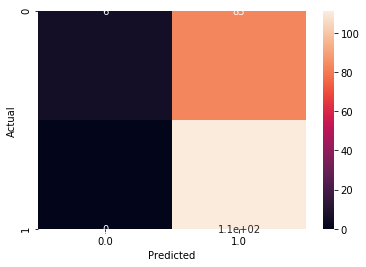

In [ ]:
remove_warnings()
################################### Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
classifier = LogisticRegression(random_state = 123)
classifier.fit(X_train,y_train)

# Prediction
y_pred = classifier.predict_proba(X_test)[::,1]

######################### Evaluation Measures
#  Calculation
clac(y_pred, y_test, "Logistic Regression")
# Cross Validation Result
#cross_validation(classifier, X_train, y_train,"Logistic Regression")
#ROC Curve
#ROC_crossValidation(classifier,X_train, y_train,"Logistic Regression")
# PR Curve
#PRC_crossValidation(classifier,X_train, y_train,"Logistic Regression")


# **Decision Tree Model**

Classifier name:  Decision Tree
              precision    recall  f1-score   support

           0       0.67      0.25      0.36        89
           1       0.60      0.90      0.72       111

    accuracy                           0.61       200
   macro avg       0.63      0.57      0.54       200
weighted avg       0.63      0.61      0.56       200



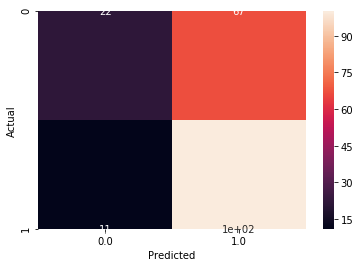

In [ ]:
remove_warnings()
##########################################################   Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict_proba(X_test)[::,1]

######################### Evaluation Measures
#  Calculation
clac(y_pred, y_test, "Decision Tree")
# Cross Validation Result
#cross_validation(classifier, X_train, y_train,"Decision Tree")
#ROC Curve
#ROC_crossValidation(classifier,X_train, y_train,"Decision Tree")
# PR Curve
#PRC_crossValidation(classifier,X_train, y_train,"Decision Tree")


##################################### Learning Curve

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = classifier
#plot_learning_curve(estimator, "Learning Curves (Decision Tree)", X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
#plt.show()

# **Random Forest Model**

Classifier name:  Random Forest
              precision    recall  f1-score   support

           0       0.88      0.40      0.55        89
           1       0.67      0.95      0.79       111

    accuracy                           0.71       200
   macro avg       0.77      0.68      0.67       200
weighted avg       0.76      0.71      0.68       200



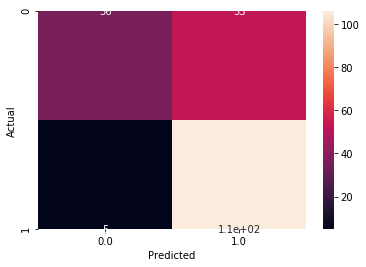

In [ ]:
remove_warnings()
########################################### Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict_proba(X_test)[::,1]


######################### Evaluation Measures
#  Calculation
clac(y_pred, y_test, "Random Forest")
# Cross Validation Result
#cross_validation(classifier, X_train, y_train,"Random Forest")
#ROC Curve
#ROC_crossValidation(classifier,X_train, y_train,"Random Forest")
# PR Curve
#PRC_crossValidation(classifier,X_train, y_train,"Random Forest")

##################################### Learning Curve

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = classifier
#plot_learning_curve(estimator, "Learning Curves (Random Forest)", X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
#plt.show()



# **Naie Bayes Model**

Classifier name:  Naive Bayes
              precision    recall  f1-score   support

           0       0.91      0.72      0.81        89
           1       0.81      0.95      0.87       111

    accuracy                           0.84       200
   macro avg       0.86      0.83      0.84       200
weighted avg       0.86      0.84      0.84       200



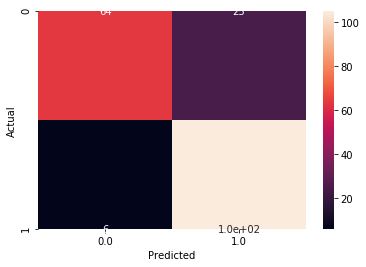

In [ ]:
remove_warnings()
########################################## Naive Bayes Classifier Model
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict_proba(X_test)[::,1]

######################### Evaluation Measures
#  Calculation
clac(y_pred, y_test, "Naive Bayes")
# Cross Validation Result
#cross_validation(classifier, X_train, y_train,"Naive Bayes")
#ROC Curve
#ROC_crossValidation(classifier,X_train, y_train,"Naive Bayes")
# PR Curve
#PRC_crossValidation(classifier,X_train, y_train,"Naive Bayes")

##################################### Learning Curve

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = classifier
#plot_learning_curve(estimator, "Learning Curves (Multinomial Naive Bayes )", X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
#plt.show()

# **KNN Classifier Model**

Classifier name:  K-nearest neighbor
              precision    recall  f1-score   support

           0       0.81      0.25      0.38        89
           1       0.61      0.95      0.75       111

    accuracy                           0.64       200
   macro avg       0.71      0.60      0.56       200
weighted avg       0.70      0.64      0.58       200



NameError: ignored

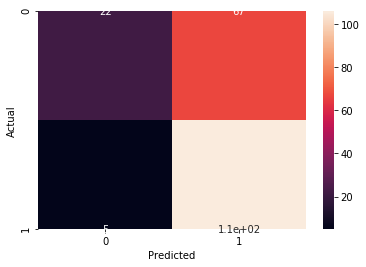

In [ ]:
remove_warnings()
########################################## KNN Classifier Model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

######################### Evaluation Measures
#  Calculation
clac(y_pred, y_test, "K-nearest neighbor")
# Cross Validation Result
#cross_validation(classifier, X_train, y_train,"K-nearest neighbor")
#ROC Curve
#ROC_crossValidation(classifier,X_train, y_train,"K-nearest neighbor")
# PR Curve
#PRC_crossValidation(classifier,X_train, y_train,"K-nearest neighbor")


##################################### Learning Curve

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = classifier
plot_learning_curve(estimator, "Learning Curves (KNN Classifier)", X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

# **Linear SVM Model**

Classifier name:  Linear Support Vector Machine
              precision    recall  f1-score   support

           0       0.60      0.93      0.73        89
           1       0.90      0.50      0.64       111

    accuracy                           0.69       200
   macro avg       0.75      0.71      0.68       200
weighted avg       0.77      0.69      0.68       200



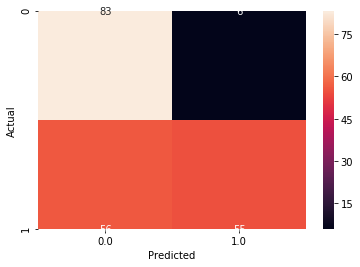

In [ ]:
remove_warnings()
########################################## Linear SVM Classifier Model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',probability=True, random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict_proba(X_test)[::,1]

######################### Evaluation Measures
#  Calculation
clac(y_pred, y_test, "Linear Support Vector Machine")
# Cross Validation Result
#cross_validation(classifier, X_train, y_train,"Linear Support Vector Machine")
#ROC Curve
#ROC_crossValidation(classifier,X_train, y_train,"Linear Support Vector Machine")
# PR Curve
#PRC_crossValidation(classifier,X_train, y_train,"Linear Support Vector Machine")

##################################### Learning Curve

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = classifier
#plot_learning_curve(estimator, "Learning Curves (Linear SVM)", X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
#plt.show()

# **Kernel SVM Model**

Classifier name:  RBF Support Vector Machine
              precision    recall  f1-score   support

           0       0.58      0.93      0.72        89
           1       0.90      0.47      0.62       111

    accuracy                           0.68       200
   macro avg       0.74      0.70      0.67       200
weighted avg       0.76      0.68      0.66       200



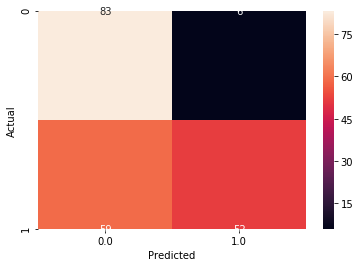

In [ ]:
remove_warnings()
########################################## Kernel SVM Classifier Model
from sklearn.svm import SVC
classifier = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.0001, random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict_proba(X_test)[::,1]

######################### Evaluation Measures
#  Calculation
clac(y_pred, y_test, "RBF Support Vector Machine")
# Cross Validation Result
#cross_validation(classifier, X_train, y_train,"RBF Support Vector Machine")
#ROC Curve
#ROC_crossValidation(classifier,X_train, y_train,"RBF Support Vector Machine")
# PR Curve
#PRC_crossValidation(classifier,X_train, y_train,"RBF Support Vector Machine")


##################################### Learning Curve

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = classifier
#plot_learning_curve(estimator, "Learning Curves (Kernel SVM)", X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
#plt.show()

# **SGD Classifier**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Classifier name:  Stochastic Gradient Descent
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        89
           1       0.57      1.00      0.73       111

    accuracy                           0.58       200
   macro avg       0.79      0.53      0.43       200
weighted avg       0.76      0.58      0.46       200



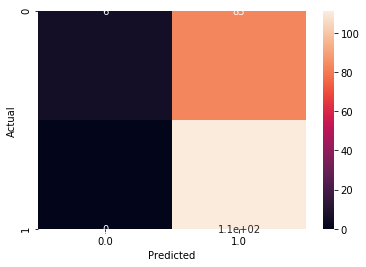

In [ ]:

################################################# SGD Classifier Model
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(loss="log", penalty="l2", max_iter=5)
classifier.fit(X_train, y_train)  
# Prediction
y_pred = classifier.predict_proba(X_test)[::,1]

######################### Evaluation Measures
#  Calculation
clac(y_pred, y_test, "Stochastic Gradient Descent")
# Cross Validation Result
#cross_validation(classifier, X_train, y_train,"Stochastic Gradient Descent")
#ROC Curve
#ROC_crossValidation(classifier,X_train, y_train,"Stochastic Gradient Descent")
# PR Curve
#PRC_crossValidation(classifier,X_train, y_train,"Stochastic Gradient Descent")
remove_warnings()


##################################### Learning Curve

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = classifier
#plot_learning_curve(estimator, "Learning Curves (SGD Classifier)", X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
#plt.show()

# **ROC Curve**

AUC: 0.875


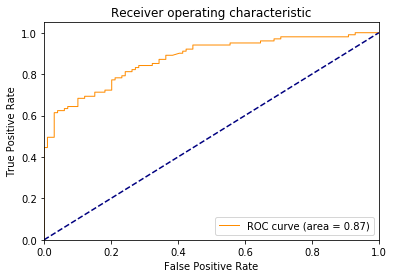

In [ ]:
# ROC curve
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr,_ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# **Precision Recall Curve**

Average precision-recall score RF: 0.8978270680491593


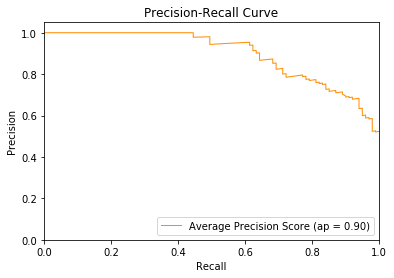

In [ ]:
#Using Precision - Recall Curve

average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score RF: {}'.format(average_precision))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=1, label='Average Precision Score (ap = %0.2f)' % average_precision)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# **Grid Search for selecting best model**

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV    
parameters = [{'C':[1,10,100,1000],'kernel':['linear']}, 
               {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.0007,0.1,0.0001,0.000001]}]
grid_search = GridSearchCV(estimator=classifier,param_grid = parameters, 
                           scoring = 'accuracy', cv =10, n_jobs = -1)
grid_search = grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

# **Drawing multiple ROC-Curves in a single plot**

In [ ]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier


from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=0), 
               MultinomialNB(), 
               #KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2), 
               #DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
               #RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0),
               SVC(kernel = 'linear',probability=True, random_state = 0),
               #SVC(C=1000,kernel = 'rbf',probability=True, gamma = 0.0001, random_state = 0),
               SGDClassifier(loss="log", penalty="l2", max_iter=15)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    
    auc = roc_auc_score(y_test, y_pred)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# **Plot the Figure**

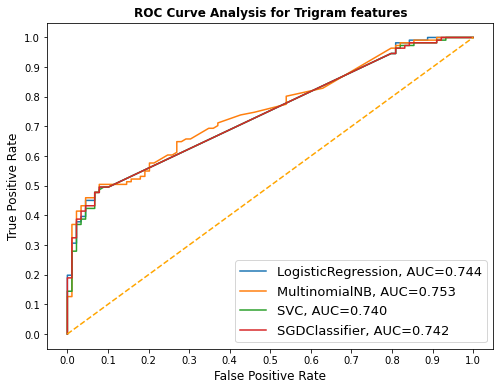

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=12)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=12)

plt.title('ROC Curve Analysis for Trigram features', fontweight='bold', fontsize=12)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# **Drawing Multiple PR-curves in a single plot**

In [ ]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=0), 
               MultinomialNB(), 
               #KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2), 
               #DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
               #RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0),
               SVC(kernel = 'linear',probability=True, random_state = 0),
               #SVC(C=1000,kernel = 'rbf',probability=True, gamma = 0.0001, random_state = 0),
               SGDClassifier(loss="log", penalty="l2", max_iter=15)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'precision','recall','AP'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[::,1]
    
    precision, recall,_ = precision_recall_curve(y_test, y_pred)
    
    average_precision = average_precision_score(y_test, y_pred)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'precision':precision, 
                                        'recall':recall, 
                                        'AP': average_precision}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# **Plot the Figure**

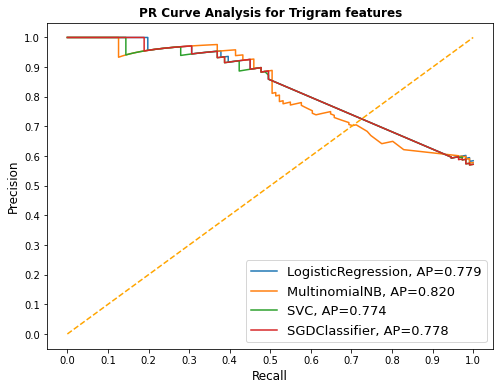

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['recall'], 
             result_table.loc[i]['precision'], 
             label="{}, AP={:.3f}".format(i, result_table.loc[i]['AP']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=12)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=12)

plt.title('PR Curve Analysis for Trigram features', fontweight='bold', fontsize=12)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# **Box Plot**

LR: 0.56 (0.012251)
KNN: 0.50 (0.020220)
DT: 0.55 (0.010829)
RF: 0.56 (0.017035)
MNB: 0.58 (0.022517)
SVM: 0.63 (0.044435)
SGD: 0.58 (0.044660)


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


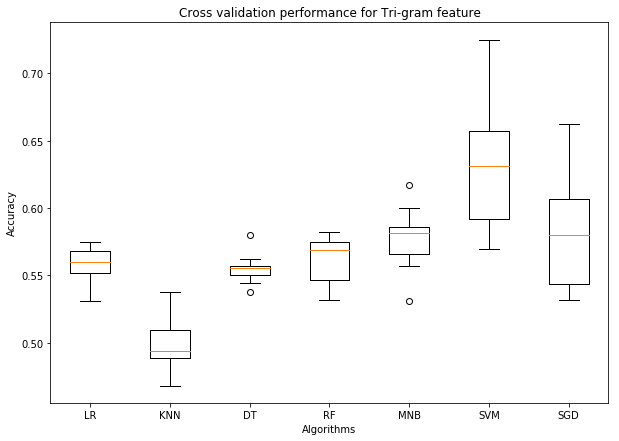

In [ ]:
remove_warnings()
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state=0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3, metric = 'minkowski', p=2)))
models.append(('DT', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('RF', RandomForestClassifier(n_estimators=5, criterion ='entropy', random_state = 0)))
models.append(('MNB', MultinomialNB()))
models.append(('SVM', SVC(kernel = 'linear',probability=True, random_state = 0)))
models.append(('SGD', SGDClassifier(loss="log", penalty="l2", max_iter=1000)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	#kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %0.2f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
#plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,7))
plt.title('Cross validation performance for Tri-gram feature')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
#plt.savefig('result.png')